In [51]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
def string_termination_check(n):
    string_ends = [(i, end) for i in range(n) for end in ['a', 'b']]

    while len(string_ends) > 1:
        end1, end2 = random.sample(string_ends, 2)
        if end1[0] == end2[0]:
            string_ends.remove(end1)
            string_ends.remove(end2)
        else:
            higher_string_id = max(end1[0], end2[0])
            string_ends = [end for end in string_ends if end[0] != higher_string_id]

    terminated_correctly = len(string_ends) == 0

    return terminated_correctly

n_lim = 100 
for n in range(1, n_lim + 1):    
    for _ in range(1000):
        terminated_correctly = string_termination_check(n)
        if not terminated_correctly:
            print(f"Non-termination found for n={n}")
            break
    else:
        continue
    break
else:
    print(f"All games from 1 to {n_lim} terminated correctly into loops.")

All games from 1 to 100 terminated correctly into loops.


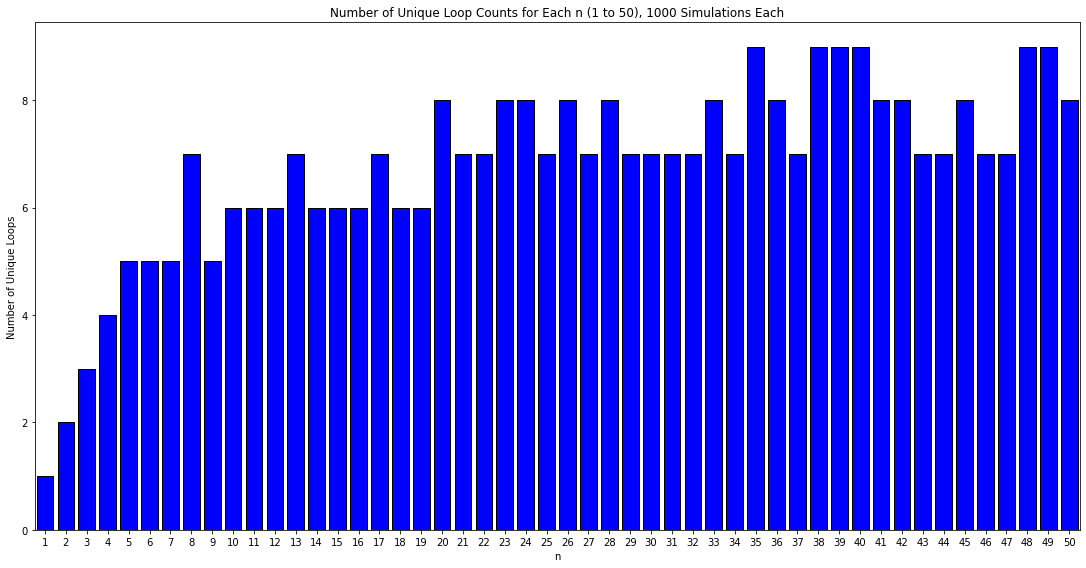

In [3]:
def simulate_string_loops(n):
    loops_formed = 0
    string_ends = [(i, end) for i in range(n) for end in ['a', 'b']]

    while len(string_ends) > 1:
        end1, end2 = random.sample(string_ends, 2)

        if end1[0] == end2[0]:
            string_ends.remove(end1)
            string_ends.remove(end2)
            loops_formed += 1
        else:
            higher_string_id = max(end1[0], end2[0])
            string_ends = [end for end in string_ends if end[0] != higher_string_id]

    return loops_formed

def simulate_multiple_string_loops(n, n_sim):
    unique_loops_counts = []
    
    for _ in range(n_sim):
        loops_formed = simulate_string_loops(n)
        unique_loops_counts.append(loops_formed)
    
    unique_counts = len(set(unique_loops_counts))
    
    return unique_loops_counts, unique_counts

upper_lim = 50
n_sim = 1000
unique_counts_per_n = []
for n in range(1, upper_lim + 1):
    _, unique_counts = simulate_multiple_string_loops(n, n_sim)
    unique_counts_per_n.append(unique_counts)

plt.figure(figsize = (15, 8))
plt.bar(range(1, upper_lim + 1), unique_counts_per_n, color = 'blue', edgecolor = 'black')
plt.title(f'Number of Unique Loop Counts for Each n (1 to {upper_lim}), {n_sim} Simulations Each')
plt.xlabel('n')
plt.xlim(0.5, upper_lim + 0.5)
plt.tight_layout()  
plt.ylabel('Number of Unique Loops')
plt.xticks(range(1, upper_lim + 1))
plt.show()

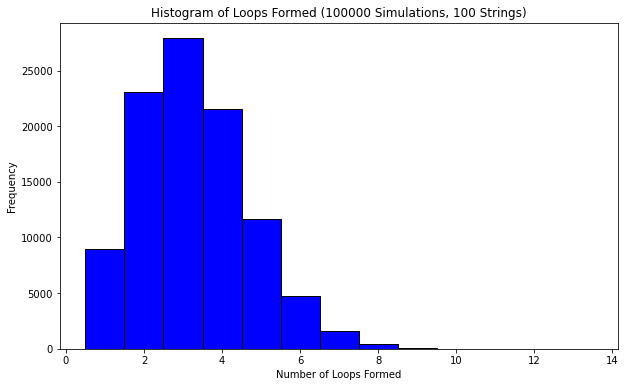

In [63]:
n_sim = 100000
n = 100
results = [simulate_string_loops(n) for _ in range(n_sim)]

plt.figure(figsize = (10, 6))
plt.hist(results, bins = range(min(results), max(results) + 2), align = 'left', color = 'blue', edgecolor = 'black')
plt.title(f'Histogram of Loops Formed ({n_sim} Simulations, {n} Strings)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Frequency')
plt.show()

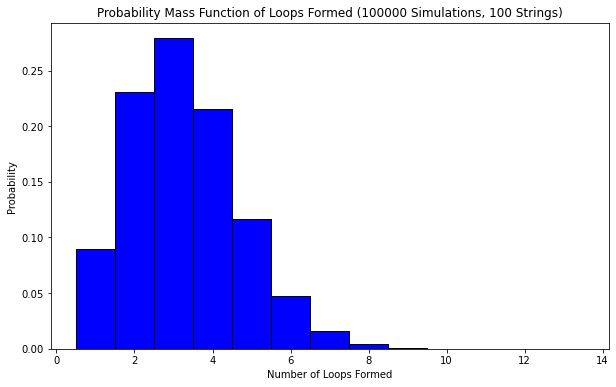

In [64]:
weights = [1/n_sim] * len(results)

plt.figure(figsize = (10, 6))
plt.hist(results, bins = range(min(results), max(results) + 2),weights = weights, align = 'left', color = 'blue', edgecolor = 'black')
plt.title(f'Probability Mass Function of Loops Formed ({n_sim} Simulations, {n} Strings)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Probability')
plt.show()

In [6]:
unique_results, counts = np.unique(results, return_counts = True)
probabilities = counts / n_sim
expected_value = np.sum(unique_results * probabilities)

print("Expected Value:", expected_value)

Expected Value: 3.3081


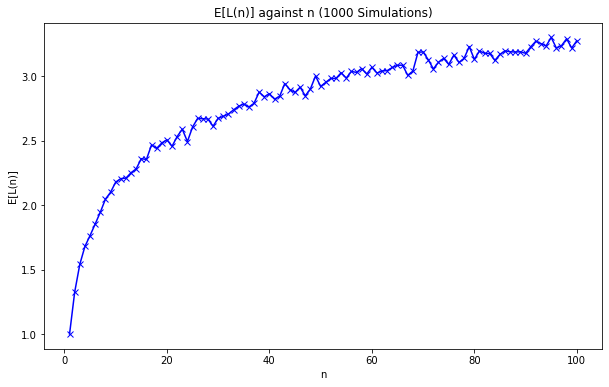

In [7]:
n_max = 100
n_sim = 1000
expected_values_mc = []

for n1 in range(1, n_max + 1):
    results = [simulate_string_loops(n1) for _ in range(n_sim)]

    unique_results, counts = np.unique(results, return_counts = True)
    probabilities = counts / n_sim
    
    expected_value = np.sum(unique_results * probabilities)
    
    expected_values_mc.append(expected_value)

plt.figure(figsize = (10, 6))
plt.plot(range(1, n_max + 1), expected_values_mc, marker = 'x',linestyle = '-', color = 'blue')
plt.title(f'E[L(n)] against n ({n_sim} Simulations)')
plt.xlabel('n')
plt.ylabel('E[L(n)]')
plt.show()

In [8]:
def recursion_expected_value_L(n):
    
    if n == 1:
        return 1
    else:
        return recursion_expected_value_L(n - 1) + 1 / (2 * n - 1)

recursion_expected_value_L(100)

3.2843421893016322

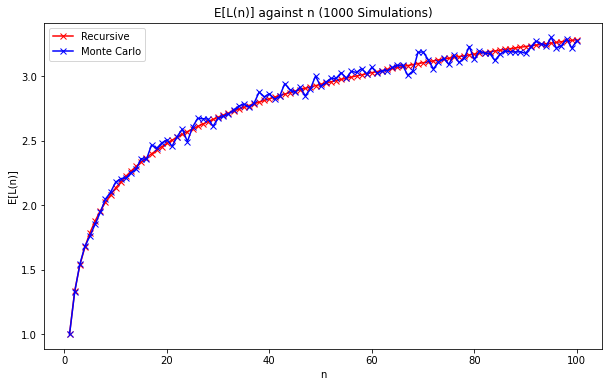

In [9]:
n_values = range(1, 101)
expected_values = [recursion_expected_value_L(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, expected_values, marker='x', color='red', label='Recursive')
plt.plot(range(1, n_max + 1), expected_values_mc, marker='x', linestyle='-', color='blue', label='Monte Carlo')
plt.title(f'E[L(n)] against n ({n_sim} Simulations)')
plt.xlabel('n')
plt.ylabel('E[L(n)]')
plt.legend()
plt.show()

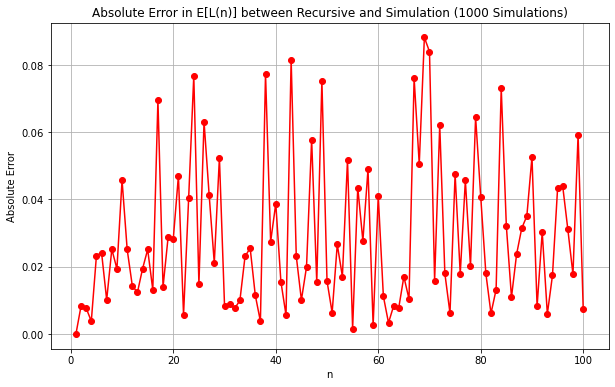

In [10]:
absolute_errors = [abs(rec - mc) for rec, mc in zip(expected_values, expected_values_mc)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_max + 1), absolute_errors, marker = 'o', linestyle = '-', color = 'red')
plt.title(f'Absolute Error in E[L(n)] between Recursive and Simulation ({n_sim} Simulations)')
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

In [11]:
def summative_expected_value_L(n):

    if n == 1:
        return 1
    sum_of_reciprocals = sum(1 / (2 * k - 1) for k in range(2, n + 1))
    return 1 + sum_of_reciprocals

summative_expected_value_L(100)

3.2843421893016327

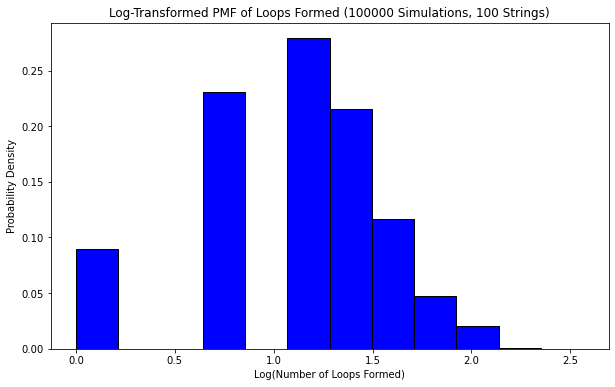

In [90]:
log_results = np.log(results)

plt.figure(figsize = (10, 6))
plt.hist(log_results, bins = 12, weights = weights, color = 'blue', edgecolor = 'black')
plt.title(f'Log-Transformed PMF of Loops Formed ({n_sim} Simulations, {n} Strings)')
plt.xlabel('Log(Number of Loops Formed)')
plt.ylabel('Probability Density')
plt.show()

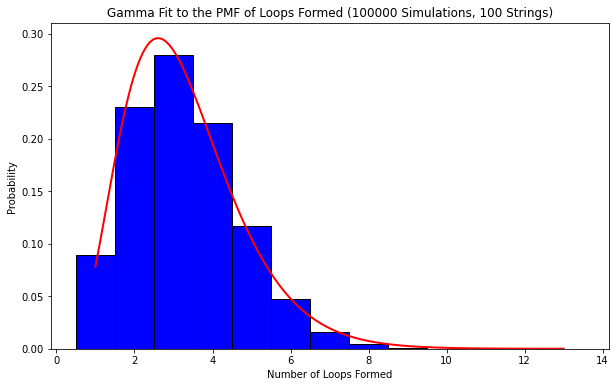

In [91]:
a, loc, scale = gamma.fit(results, floc=0)
xmin, xmax = min(results), max(results)
x = np.linspace(xmin, xmax, 1000)
pdf = gamma.pdf(x, a, loc=loc, scale=scale)

plt.figure(figsize = (10, 6))
plt.plot(x, pdf, color = 'red', linewidth = 2)
plt.hist(results, bins = range(min(results), max(results) + 2),weights = weights, align = 'left', color = 'blue', edgecolor = 'black')
plt.title(f'Gamma Fit to the PMF of Loops Formed ({n_sim} Simulations, {n} Strings)')
plt.xlabel('Number of Loops Formed')
plt.ylabel('Probability')
plt.show()

In [113]:
def simulate_string_loops_length(n):
    loops_formed = 0
    lengths = []
    string_ends = [(i, end, 1) for i in range(n) for end in ['a', 'b']]

    while len(string_ends) > 1:
        end1, end2 = random.sample(string_ends, 2)

        if end1[0] == end2[0]:
            string_ends.remove(end1)
            string_ends.remove(end2)
            loops_formed += 1
            loop_length = end1[2]
            lengths.append(loop_length)
        else:
            lower_string_id = min(end1[0], end2[0])
            higher_string_id = max(end1[0], end2[0])
            new_length = end1[2] + end2[2]

            string_ends = [end for end in string_ends if end[0] != higher_string_id]
            string_ends = [(end[0], end[1], new_length if end[0] == lower_string_id else end[2]) for end in string_ends]


    return lengths

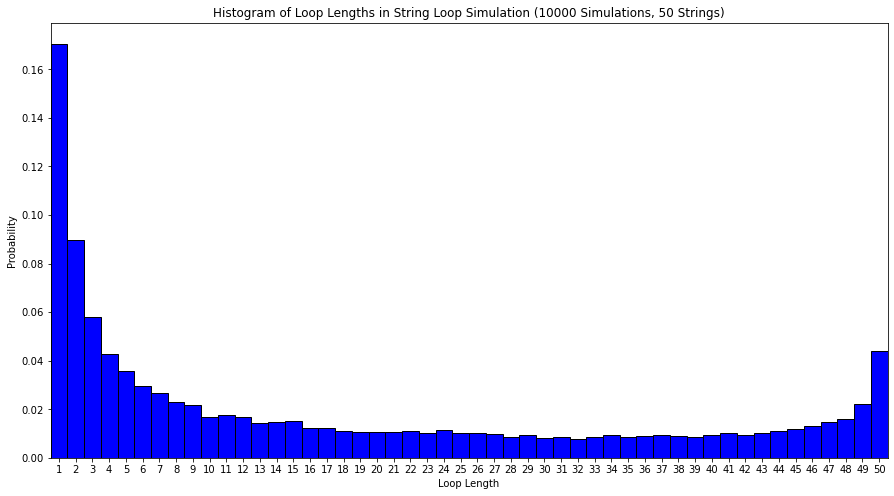

In [134]:
n_sim = 10000
n = 50
all_lengths = []

for _ in range(n_sim):
    lengths = simulate_string_loops_length(n)
    all_lengths.extend(lengths)

max_length = max(all_lengths)
min_length = min(all_lengths)

weights = weights = [1.0 / len(all_lengths)] * len(all_lengths)

plt.figure(figsize = (15, 8))
plt.hist(all_lengths, weights = weights, bins = range(min_length, max_length + 2), color = 'blue', edgecolor = 'black', align = 'left')
plt.title(f'Histogram of Loop Lengths in String Loop Simulation ({n_sim} Simulations, {n} Strings)' )
plt.xlabel('Loop Length')
plt.ylabel('Probability')
plt.xlim(0.5, max_length + 0.5)
plt.xticks(range(min_length, max_length + 1))
plt.show()

In [135]:
probs = []
all_lengths = []
n_sim = 1000

for n in range (1, 51):
    all_lengths = []
    for _ in range(n_sim):
        lengths = simulate_string_loops_length(n)
        all_lengths.extend(lengths)
    
    prob = all_lengths.count(1) / len(all_lengths)
    probs.append(prob)

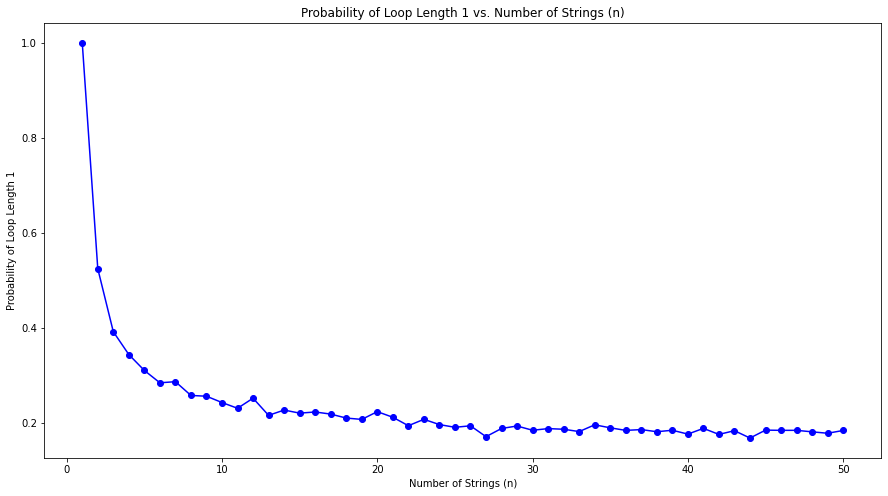

In [138]:
n_values = range(1, 51)

plt.figure(figsize = (15, 8))
plt.plot(n_values, probs, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Probability of Loop Length 1 vs. Number of Strings (n)')
plt.xlabel('Number of Strings (n)')
plt.ylabel('Probability of Loop Length 1')
plt.show()